## EDA Togo
This notebook performs exploratory data analysis (EDA) on the wind and solar dataset of Togo, using the reusable functions from ```data_prep_clean.py``` and ```eda_plots.py``` to ensure clean, consistent, and reproducible results.

## Imports

In [1]:
import sys
import pandas as pd;

sys.path.append('../../scripts')
from data_prep_clean import (
    load_data,
    get_summary_report,
    calculate_zscore_and_flag_outliers,
    clean_and_impute,
    save_cleaned_data,
)

from eda_plots import (
    load_cleaned_data,
    plot_time_series,
    plot_cleaning_impact,
    plot_correlation_heatmap,
    plot_scatter_relationships,
    plot_wind_and_distribution,
    plot_bubble_chart,
    prepare_impact_data
)

## Load Raw Data

In [2]:
raw_file_path = "../../data/togo/togo-dapaong_qc.csv"
output_dir = "../../data/togo/"
df = load_data(raw_file_path) 

✅ 'Timestamp' column successfully converted to datetime objects.


## Observe the Data

In [3]:
print("## 📊 Head: First 5 Rows for Visual Check\n")
df.head()

## 📊 Head: First 5 Rows for Visual Check



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
print("## ℹ️ Info: Data Types, Non-Null Counts, and Memory Usage\n")
df.info()

## ℹ️ Info: Data Types, Non-Null Counts, and Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64        

The raw dataset includes columns like GHI, DNI, DHI, ModA, ModB, WS, WSgust, WD, Tamb, RH, and Timestamp. Some columns may have missing values and potential outliers.

## Summary Statistics & Missing-Value Report

In [5]:
get_summary_report(df)


--- 1. Summary Statistics ---
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200

We can see which columns have high missing values (>5%) and examine summary statistics for numeric columns. This identifies potential cleaning needs.

The Comments column contained 100% missing values, providing no useful information for analysis. Therefore, it was dropped to clean the dataset and simplify further processing.

In [6]:
df = df.drop(['Comments'], axis= 1).copy()
    
print("✅ 'Comments' column dropped due to 100% missing values.")

print("After Dropping 'Comments' Column:")
df.head()

✅ 'Comments' column dropped due to 100% missing values.
After Dropping 'Comments' Column:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


Negative solar radiation readings correspond to nighttime hours (when the sun isn’t shining). These values are physically meaningless for solar analysis, so they’re excluded to focus on daytime data only.

In [7]:
# Remove negative solar radiation values (GHI, DNI, DHI)
solar_cols = ['GHI', 'DNI', 'DHI']

# Count how many negative values exist before removal
negative_counts = (df[solar_cols] < 0).sum()
print("Negative value count before removal:\n", negative_counts)

# Remove rows where any solar column is negative
df = df[(df[solar_cols] >= 0).all(axis=1)]

# Reset index after filtering
df = df.reset_index(drop=True)

print(f"\nData shape after removing negatives: {df.shape}")


Negative value count before removal:
 GHI    257385
DNI         0
DHI         0
dtype: int64

Data shape after removing negatives: (268215, 18)


## Outlier Detection

In [8]:
df = calculate_zscore_and_flag_outliers(df)

outlier_rows = df[df['Outliers_Flag'] == True]
print("Count of rows with outlier values - ", df['Outliers_Flag'].sum())
print(outlier_rows.head(5))


🔹 Calculating Z-scores and flagging outliers for the following columns:
   ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

📈 ModA Specific Outliers (|Z| > 3): 0
📉 ModB Specific Outliers (|Z| > 3): 2

✅ Total rows flagged (at least one column |Z| > 3): 1608
Count of rows with outlier values -  1608
                Timestamp    GHI  DNI    DHI   ModA   ModB  Tamb    RH   WS  \
8430  2021-11-05 16:10:00   50.5  0.0   49.1   51.7   48.7  33.3  41.8  8.2   
8476  2021-11-05 16:56:00   29.6  0.0   32.4   30.4   28.9  32.4  43.3  8.5   
8477  2021-11-05 16:57:00   28.6  0.0   31.3   29.3   27.8  32.3  44.5  7.8   
11241 2021-11-09 16:02:00  142.7  7.3  146.4  132.9  124.1  33.8  42.1  6.7   
11242 2021-11-09 16:03:00  142.5  9.1  145.4  132.6  123.8  33.2  45.3  8.4   

       WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
8430     10.5      1.1  127.7     14.5  973         0            0.0   34.5   
8476     11.0      1.8  137.5     13.6  974         0        

## Cleaning & Imputation

In [9]:
impute_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_cleaned = clean_and_impute(df, impute_cols)

cleaned_file_path = output_dir + "togo_clean.csv"
save_cleaned_data(df_cleaned, cleaned_file_path) 

🔹 Replacing outliers with median for the following columns:
   ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
🔹 Imputing remaining missing values with median for key columns.
✅ Outliers replaced and missing values imputed.

✅ Cleaned Data Saved successfully to: ../../data/togo/togo_clean.csv


## Load Cleaned data

In [10]:
output_dir = "../../data/togo/"
cleaned_file_path = output_dir + "togo_clean.csv"

df_cleaned = load_cleaned_data(cleaned_file_path)
df_cleaned.head()

✅ 'Timestamp' column converted to datetime.
✅ Cleaned data loaded from: ../../data/togo/togo_clean.csv


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 05:43:00,0.0,0.0,0.6,1.2,1.2,25.2,92.7,1.8,2.1,0.3,225.4,4.8,977,0,0.0,25.0,24.8
1,2021-10-25 05:44:00,0.2,0.0,0.7,1.4,1.4,25.2,92.7,1.4,1.9,0.4,231.2,5.8,977,0,0.0,25.0,24.7
2,2021-10-25 05:45:00,0.5,0.0,0.8,1.6,1.6,25.2,92.8,1.5,1.9,0.4,229.9,7.9,977,0,0.0,25.0,24.7
3,2021-10-25 05:46:00,0.8,0.0,0.9,1.9,1.9,25.2,92.6,1.6,2.1,0.4,230.1,7.0,977,0,0.0,25.0,24.7
4,2021-10-25 05:47:00,1.0,0.0,1.0,2.1,2.1,25.1,92.5,1.6,1.9,0.4,230.0,7.0,977,0,0.0,25.0,24.7


## Time Series Analysis

Requirement: Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.

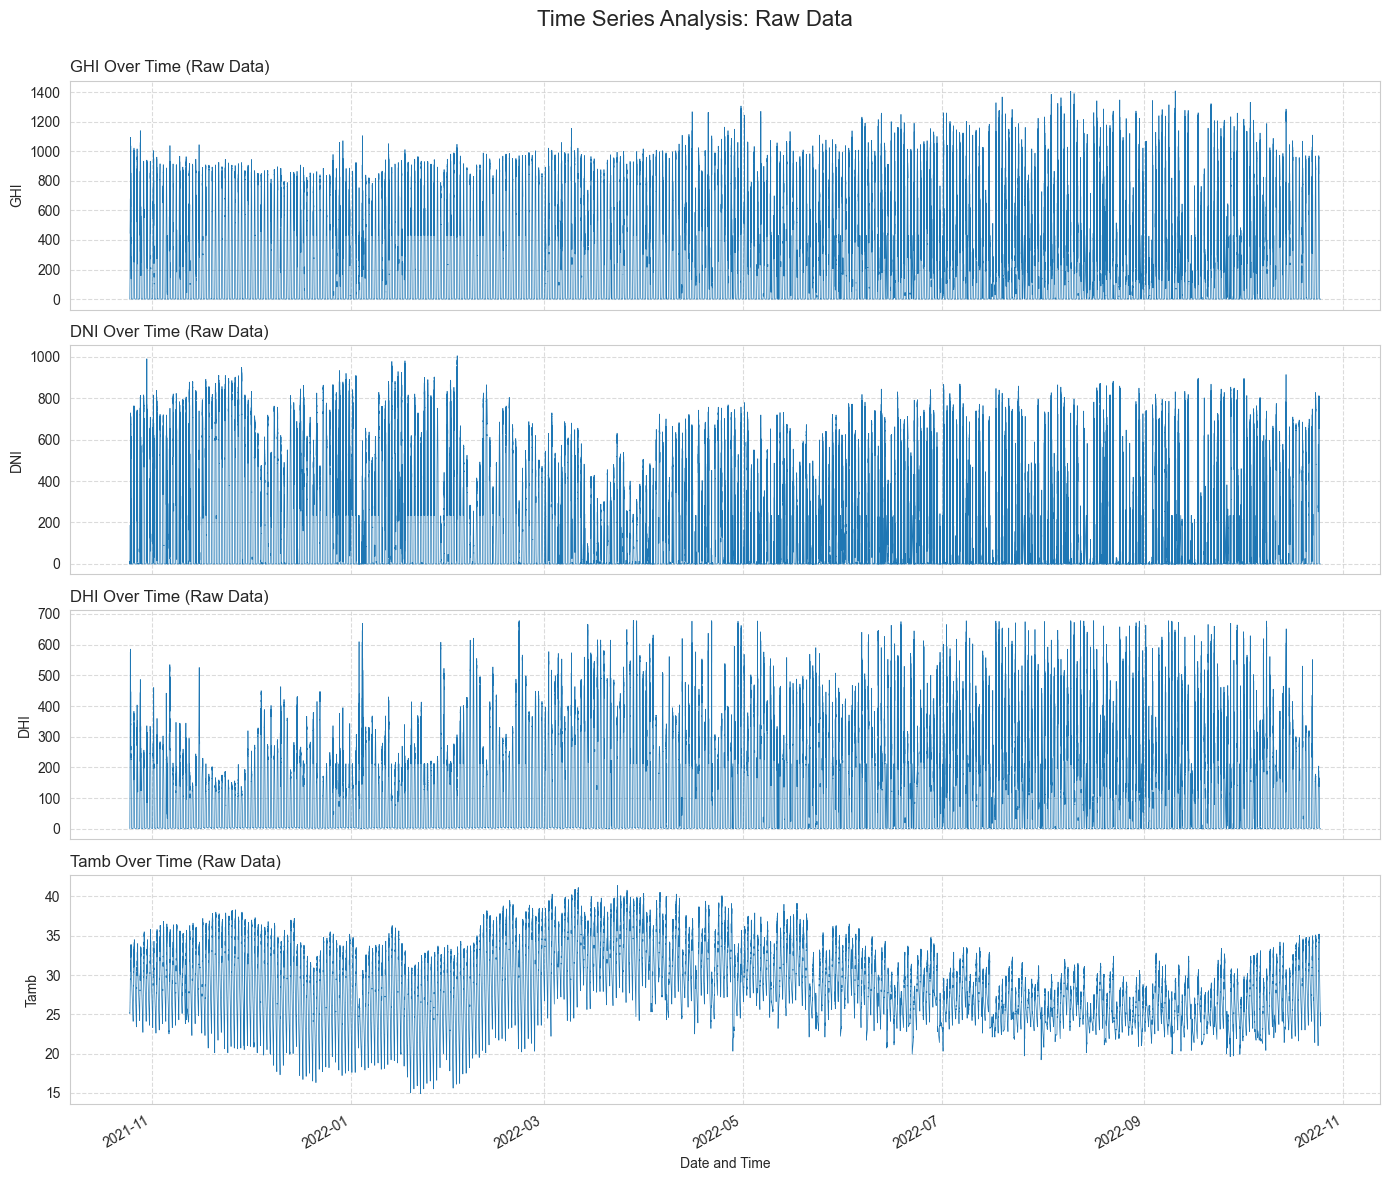

In [11]:
plot_time_series(df_cleaned)

## Cleaning Impact

Requirement: Group by Cleaning flag and plot average ModA & ModB pre/post-clean.


--- 🧑‍💻 Preparing DataFrames for Cleaning Impact Analysis ---
   -> Raw data shape: (268215, 19). Adding 'Cleaning = 0' flag.
   -> Cleaned data shape: (268215, 18). Adding 'Cleaning = 1' flag.
✅ Combined DataFrame created with 536430 rows for comparison.

--- Plotting Cleaning Impact Analysis ---

Average Values by Cleaning Flag:
                 ModA        ModB
Cleaning                        
0         443.109538  430.224900
1         442.775070  429.910576


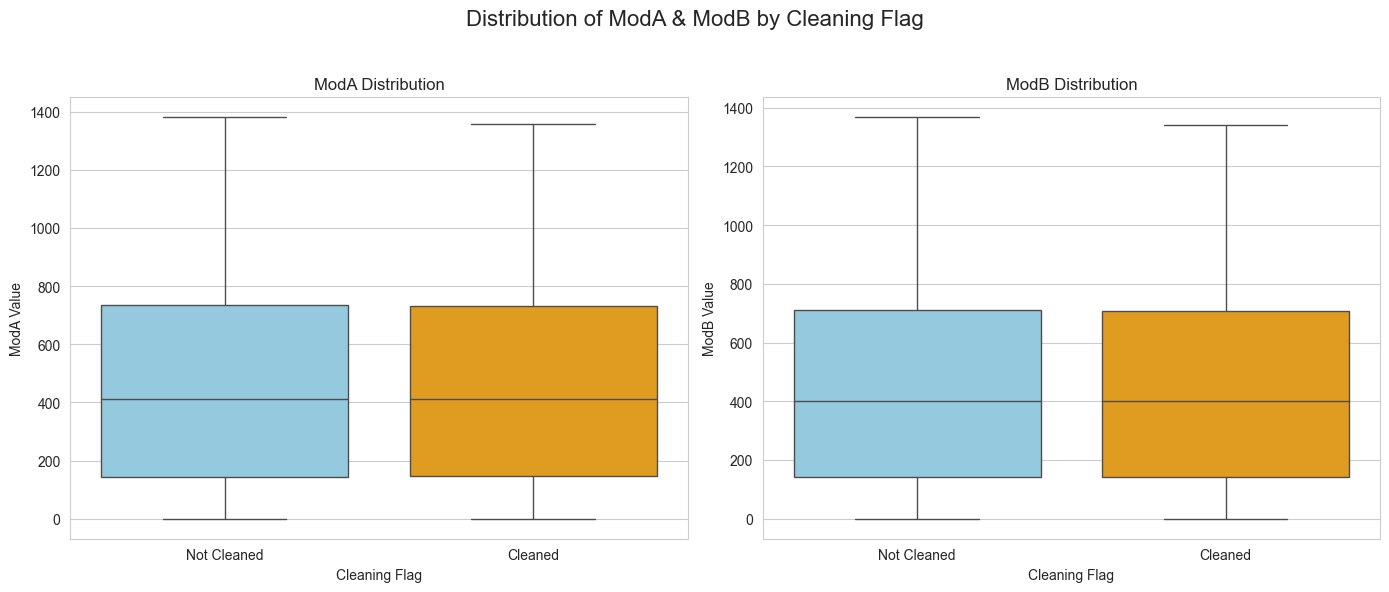

In [12]:
df_combined_for_impact = prepare_impact_data(df, df_cleaned)

# --- Plotting Step ---
if df_combined_for_impact is not None:
    plot_cleaning_impact(df_combined_for_impact)

# Correlation and Relationship Analysis

### Correlation Heatmap

Requirement: Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).


--- Plotting Correlation Heatmap ---


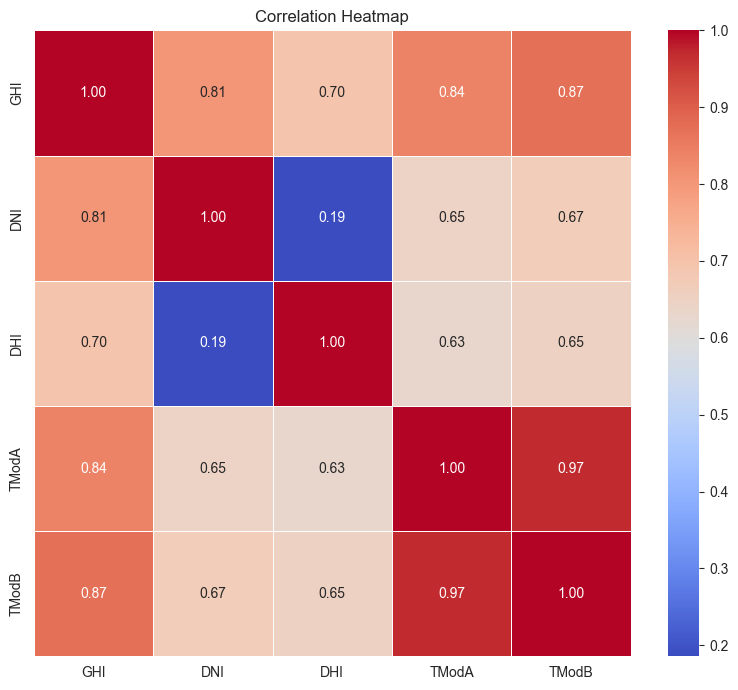

In [13]:
plot_correlation_heatmap(df_cleaned)

#### Scatter Plots

Requirement: Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.


--- Plotting Relationship Scatter Plots ---


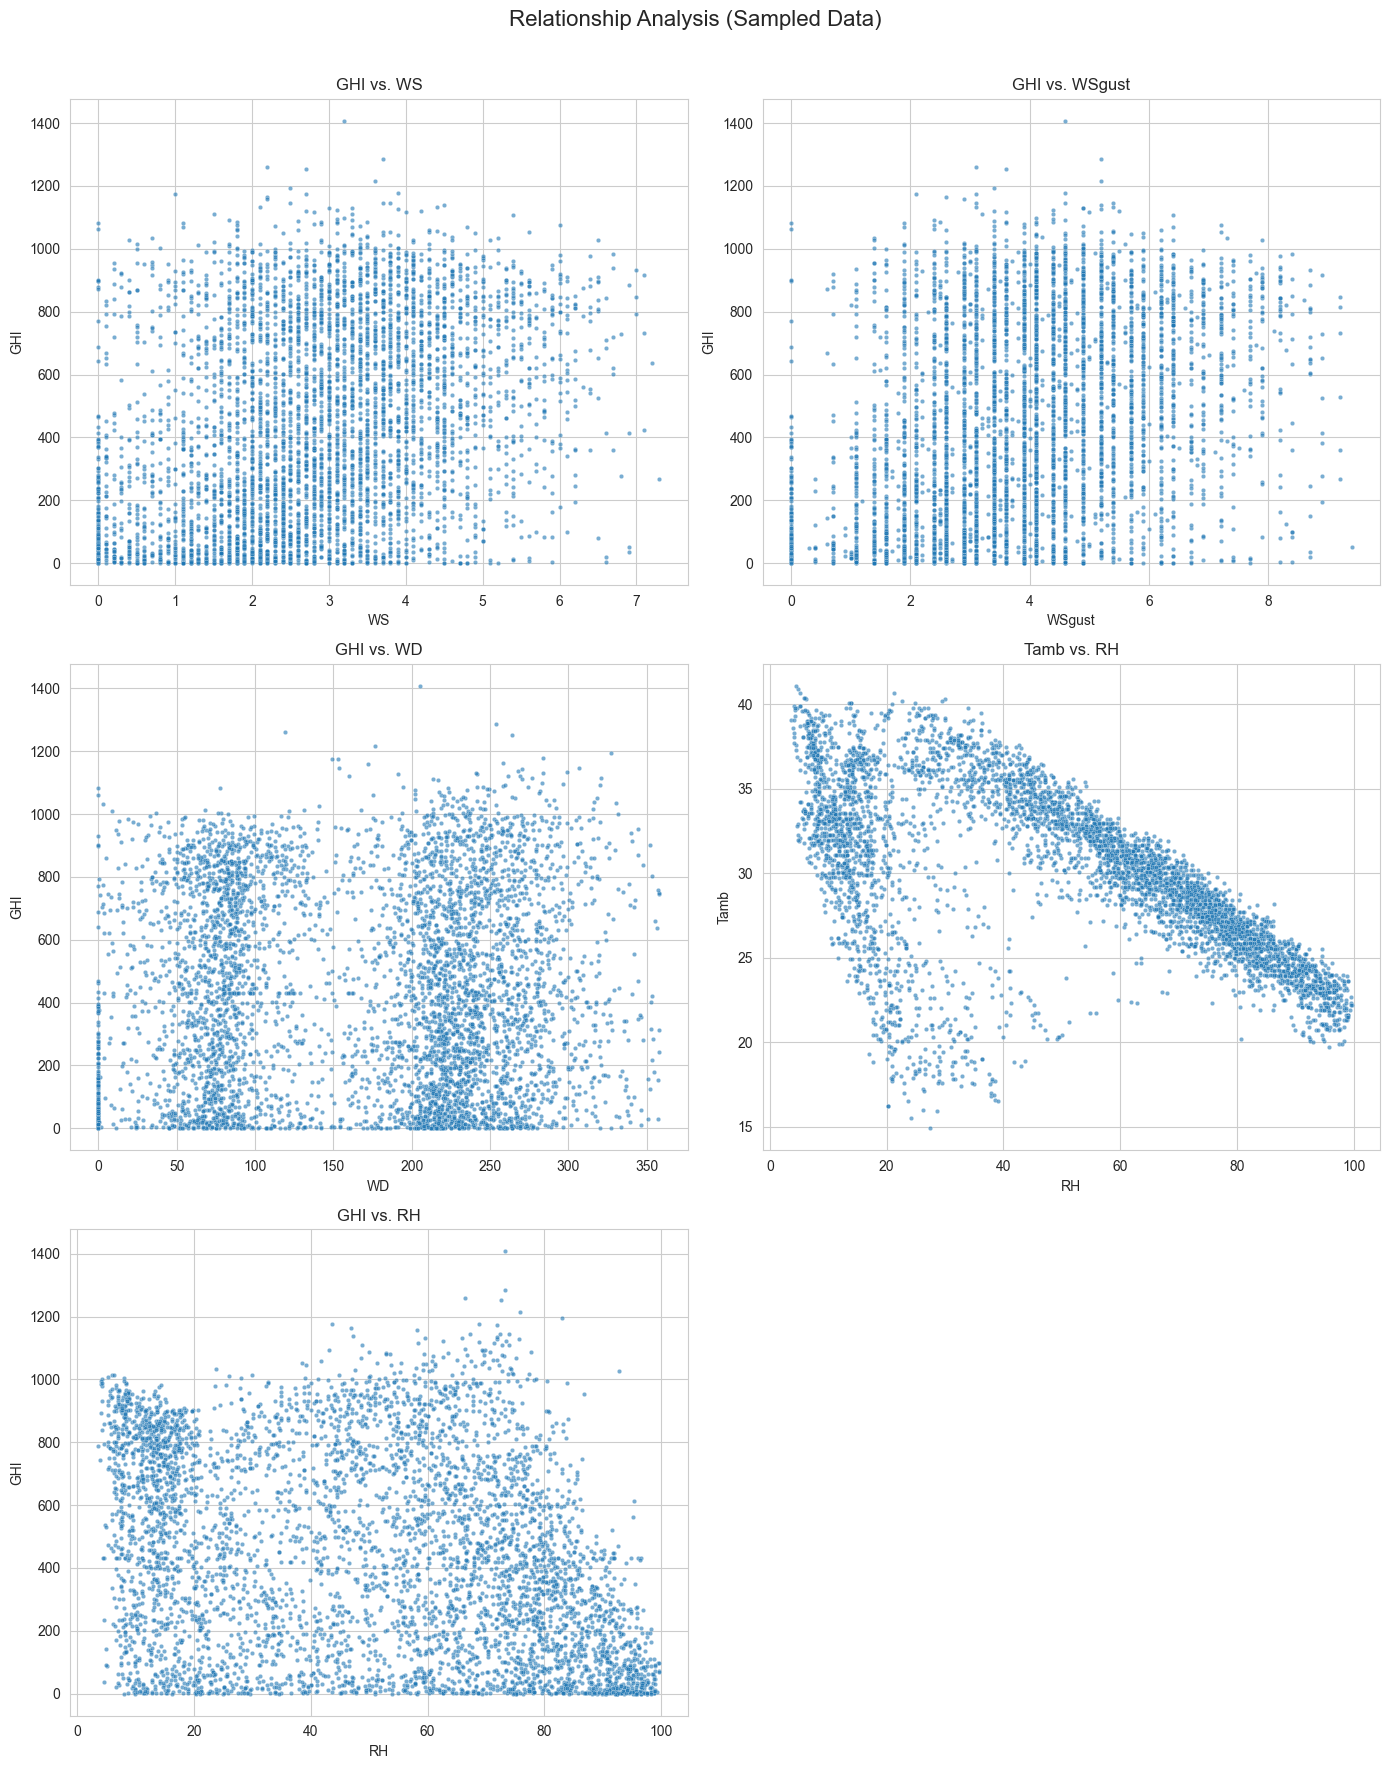

In [14]:
plot_scatter_relationships(df_cleaned)

## Wind & Distribution Analysis

Requirement: Wind rose or radial bar plot of WS/WD and Histograms for GHI and one other variable (WS).


--- Plotting Distribution Histograms ---


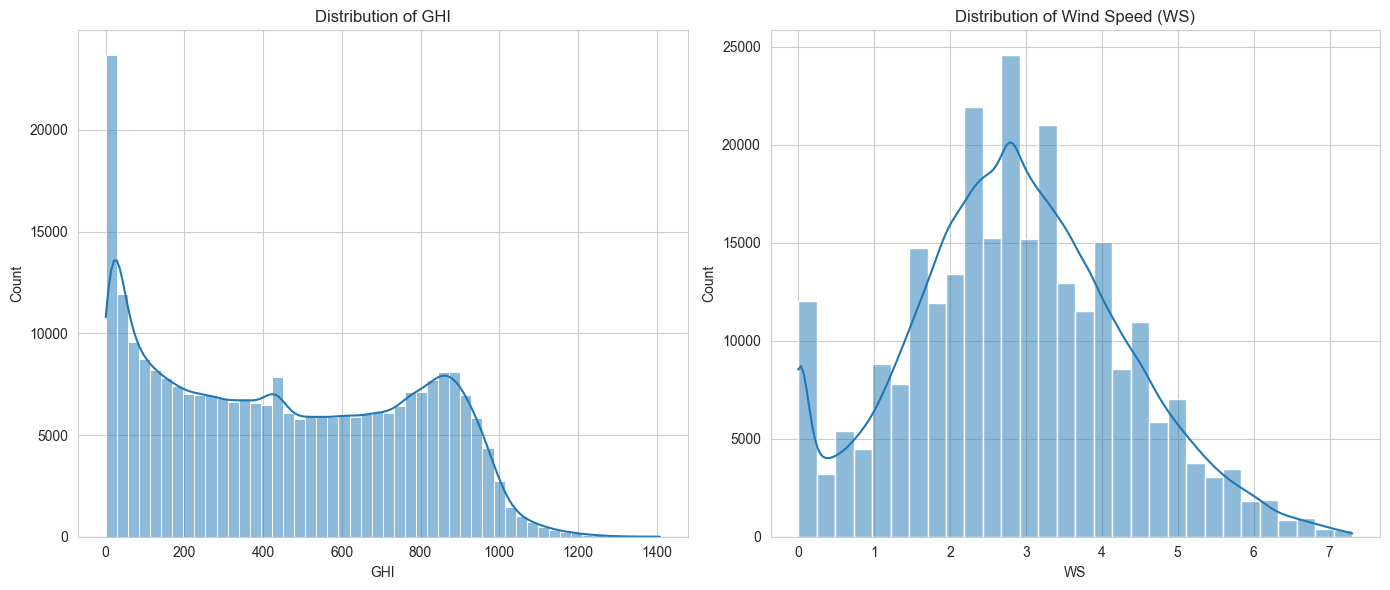


--- Plotting Wind Rose ---


<Figure size 800x800 with 0 Axes>

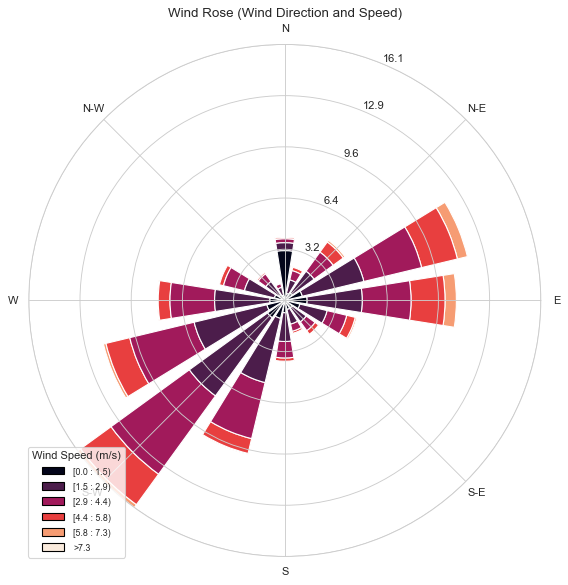

In [15]:
plot_wind_and_distribution(df_cleaned)

### Temperature Analysis & Bubble Chart
Requirement: Examine how relative humidity (RH) might influence temperature readings and solar radiation, visualized using a Bubble Chart (GHI vs. Tamb with bubble size = RH).


--- Plotting Bubble Chart (GHI vs. Tamb, Size = RH) ---


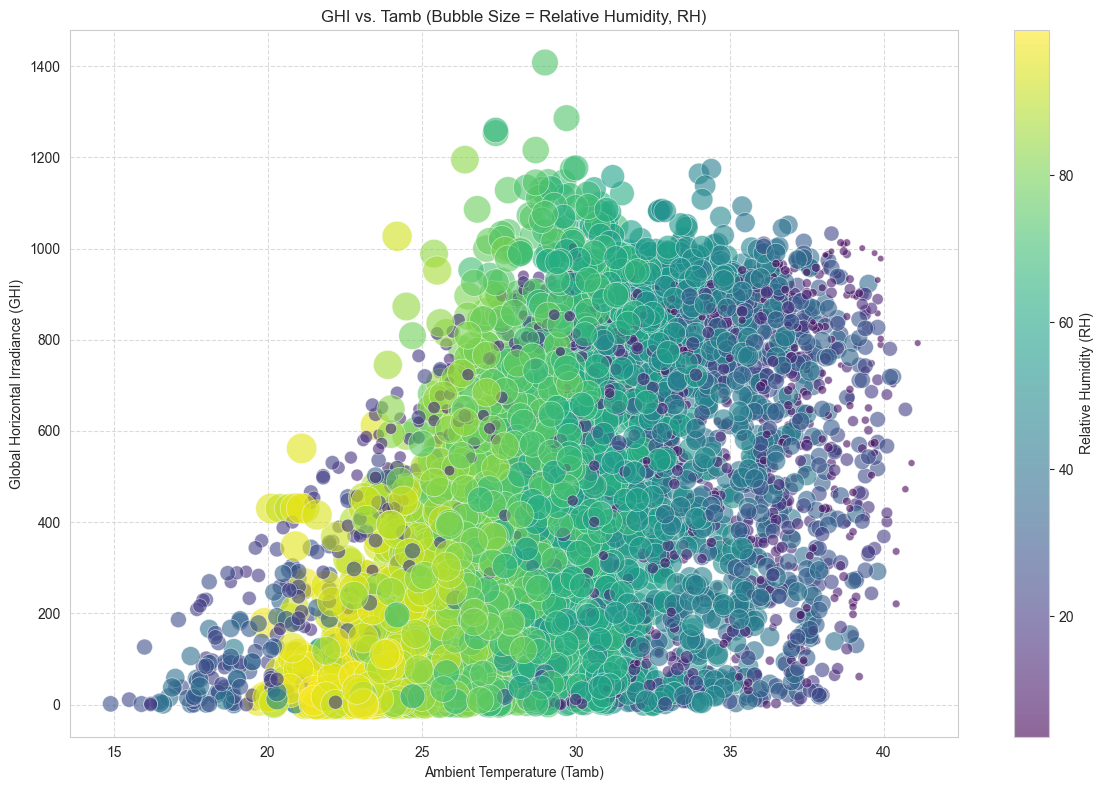

In [16]:
plot_bubble_chart(df_cleaned)